tensor([-0.1059,  0.1452, -0.5437])
tensor([-0.5070, -1.8794,  0.3222])


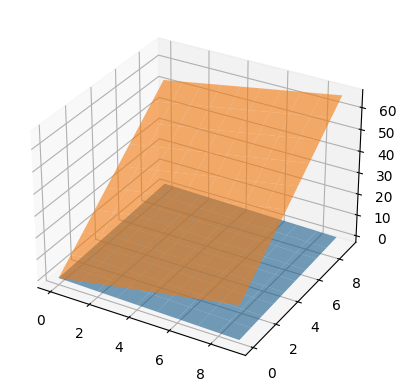

In [77]:
# https://stackoverflow.com/questions/36060933/matplotlib-plot-a-plane-and-points-in-3d-simultaneously
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def pltPlanesIn3D(norms=[], offsets=[], points=[], xyranges=[10, 10], alpha=0.6, title='', pltRow=False):

    if not len(norms) == len(offsets):
        raise ValueError(
            'offset vector length should be equal to the norms length.')

    # Create the figure
    fig = plt.figure()
    # Add an axes
    if not pltRow:
        ax = fig.add_subplot(111, projection='3d')
        for point in points:
            # and plot the points
            ax.scatter(point[0], point[1], point[2])

    plt.title(title)

    # Sample
    # print (max(norms),min(norms))
    xx, yy = np.meshgrid(range(xyranges[0]), range(xyranges[1]))

    for idx, normal in enumerate(norms):

        if pltRow:
            ax = plt.subplot(1, len(norms), idx+1, projection='3d')
        # a plane is a*x+b*y+c*z+d=0
        # [a,b,c] is the normal. Thus, we have to calculate
        print(normal)
        a, b, c = normal

        d = offsets[idx]

        zz = (a * xx + b * yy + d) * -1. / c

        # plot the surfaces

        ax.plot_surface(xx, yy, zz, alpha=alpha)


def getRandom3DPlaneNorms(n, mean = 0, std = 1,offsets=False):
    return (torch.normal(mean,std,size=(n, 3)), torch.rand(size=(n, 1))) if offsets \
        else (torch.normal(mean,std,size=(n, 3)), torch.zeros(n))


pltPlanesIn3D(*getRandom3DPlaneNorms(2))


tensor([[0.5792, 0.1415, 0.5113],
        [0.7721, 0.9872, 0.1109],
        [0.2233, 0.0332, 0.0838],
        [0.2877, 0.3913, 0.0344]])


ValueError: too many values to unpack (expected 3)

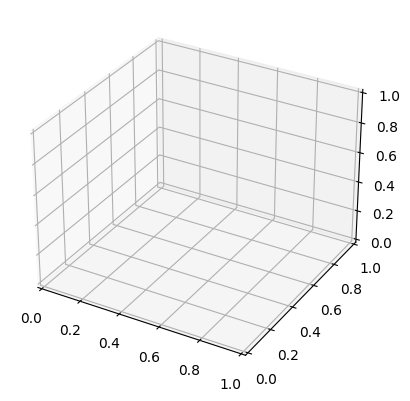